In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wine-clustering.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


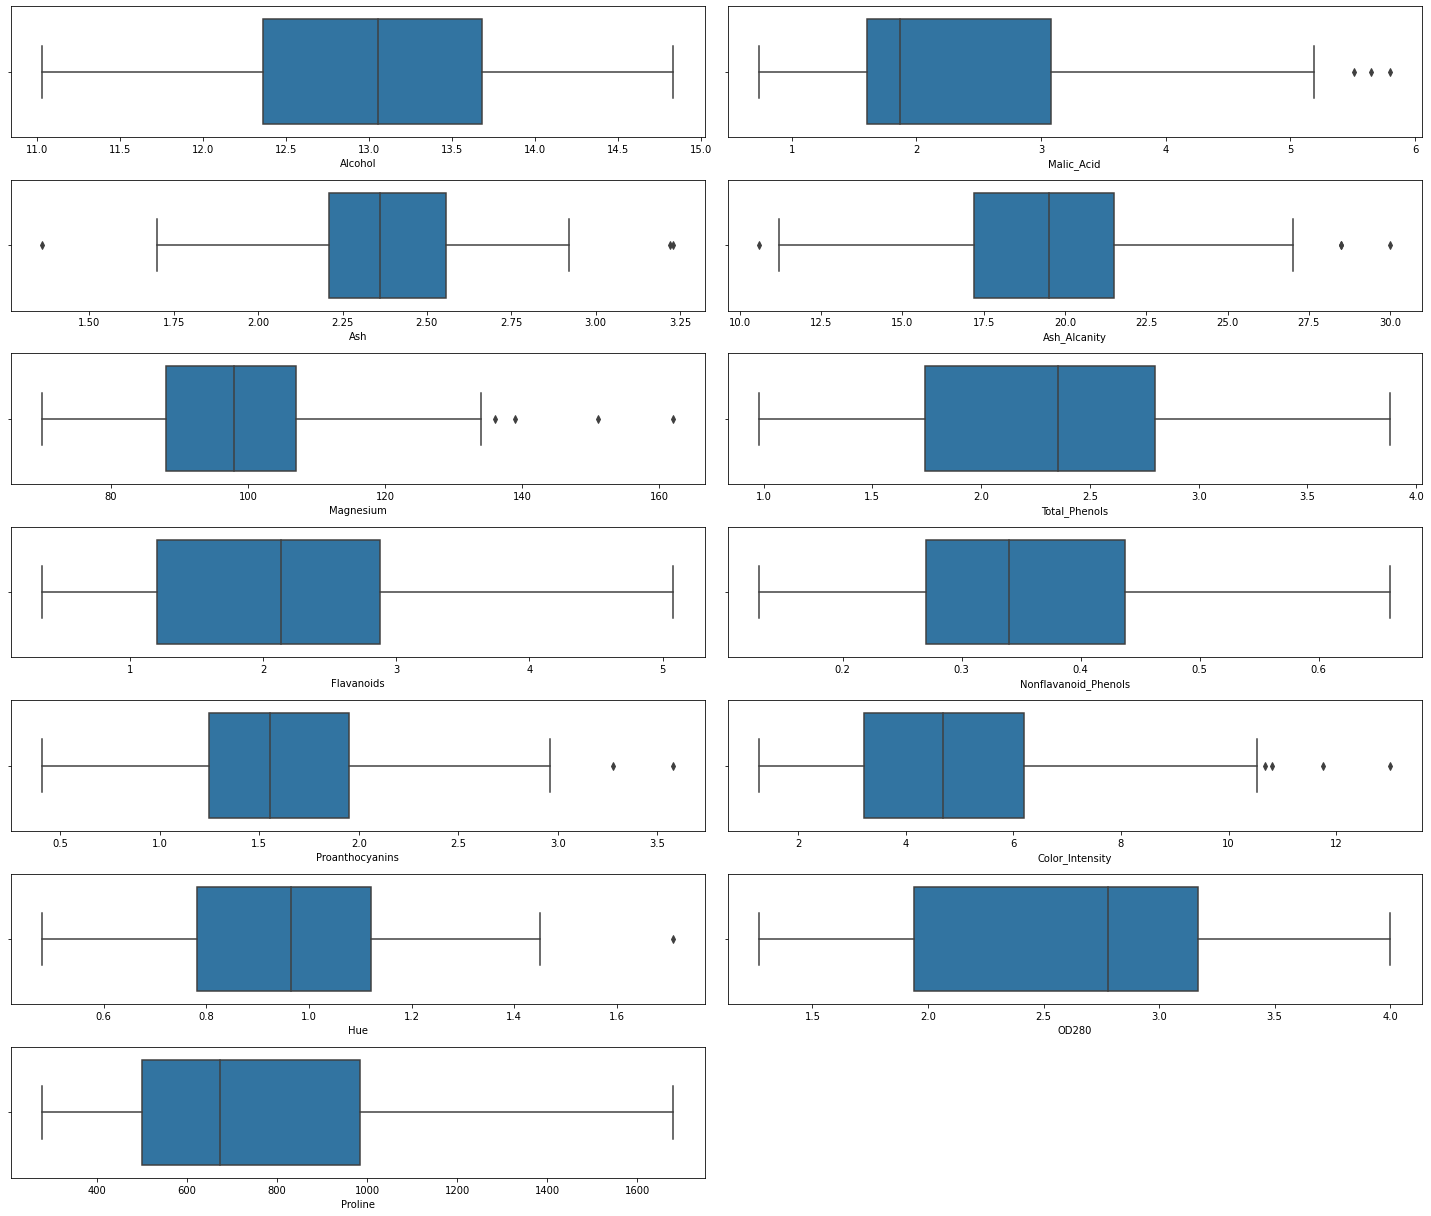

In [6]:
t=1
plt.figure(figsize=(20,17))
for i in data.columns:
    plt.subplot(7,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [7]:
for i in data.columns:
    q1 = np.quantile(data[i],0.25)
    q3 = np.quantile(data[i],0.75)
    iqr = q3-q1
    ul = q3+(1.5*iqr)
    ll = q1-(1.5*iqr)
    
    data.loc[data[i]>ul,i]=ul
    data.loc[data[i]<ll,i]=ll

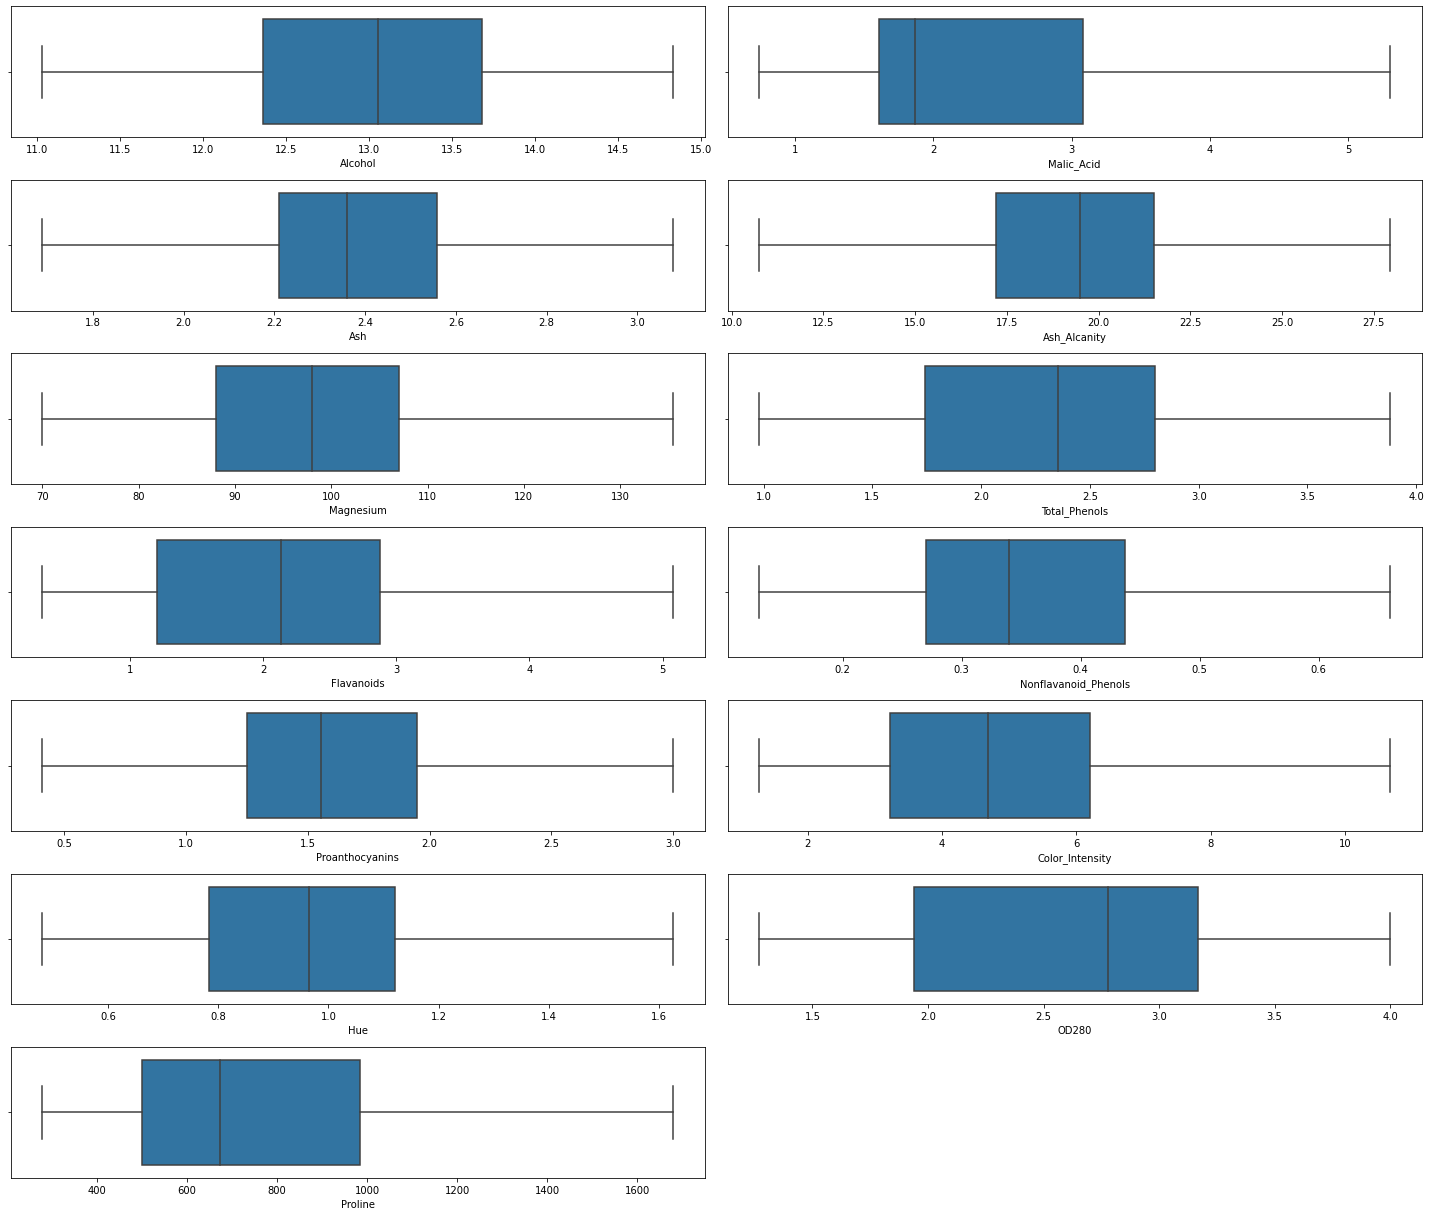

In [8]:
t=1
plt.figure(figsize=(20,17))
for i in data.columns:
    plt.subplot(7,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

### Standard scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
data_s = sc.fit_transform(data)

In [12]:
data_s = pd.DataFrame(data_s,columns=data.columns)

In [13]:
data_s

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952
174,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893
175,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575
176,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498


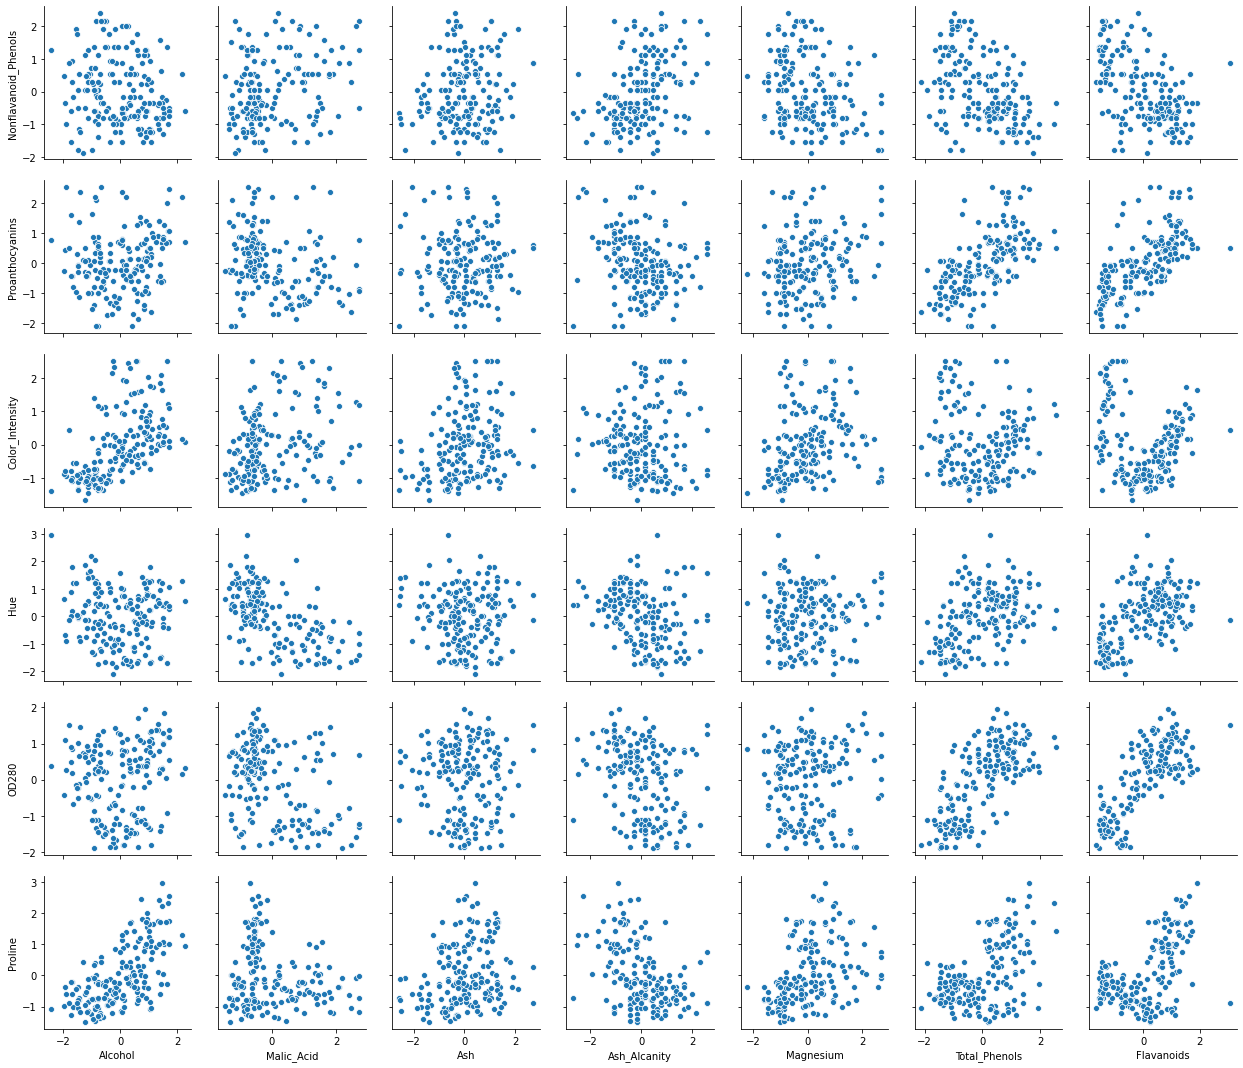

In [14]:
sns.pairplot(data_s,x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids'],
            y_vars = ['Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
plt.show()

In [15]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

### K-Means Clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
n_clus = [2,3,4,5,6,7,8]

In [18]:
wcss = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data_s)
    wcss.append(model.inertia_)
    

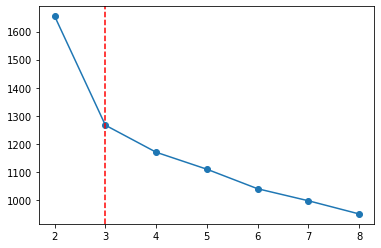

In [19]:
plt.plot(n_clus,wcss,marker='o')
plt.axvline(3,color='r',ls='--')
plt.show()

In [20]:
sil_score = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    pred = model.fit_predict(data_s)
    sil_score.append(silhouette_score(data_s,pred))
    

In [21]:
sil_score

[0.2683033835436911,
 0.2854626783251893,
 0.24148107158370563,
 0.22821282842373233,
 0.19490243872611854,
 0.15367234190638393,
 0.14171221595811484]

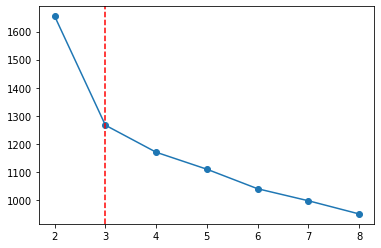

In [22]:
plt.plot(n_clus,wcss,marker='o')
plt.axvline(3,color='r',ls='--')
plt.show()

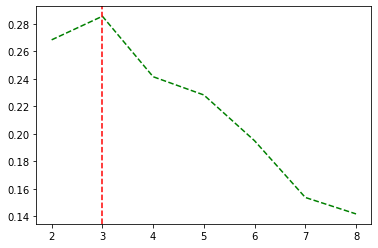

In [23]:
plt.plot(n_clus,sil_score,ls='--',color='green')
plt.axvline(3,color='r',ls='--')
plt.show()

In [24]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [25]:
kelbow_viz = KElbowVisualizer(KMeans(),k=8)

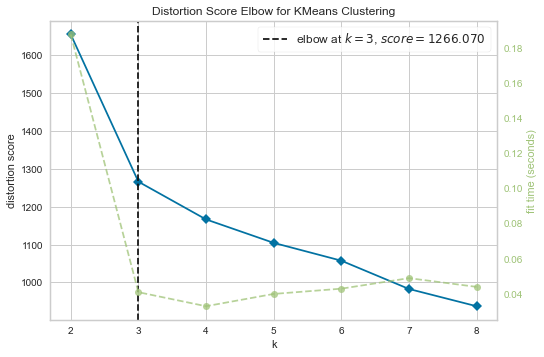

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kelbow_viz.fit(data_s)
kelbow_viz.show()

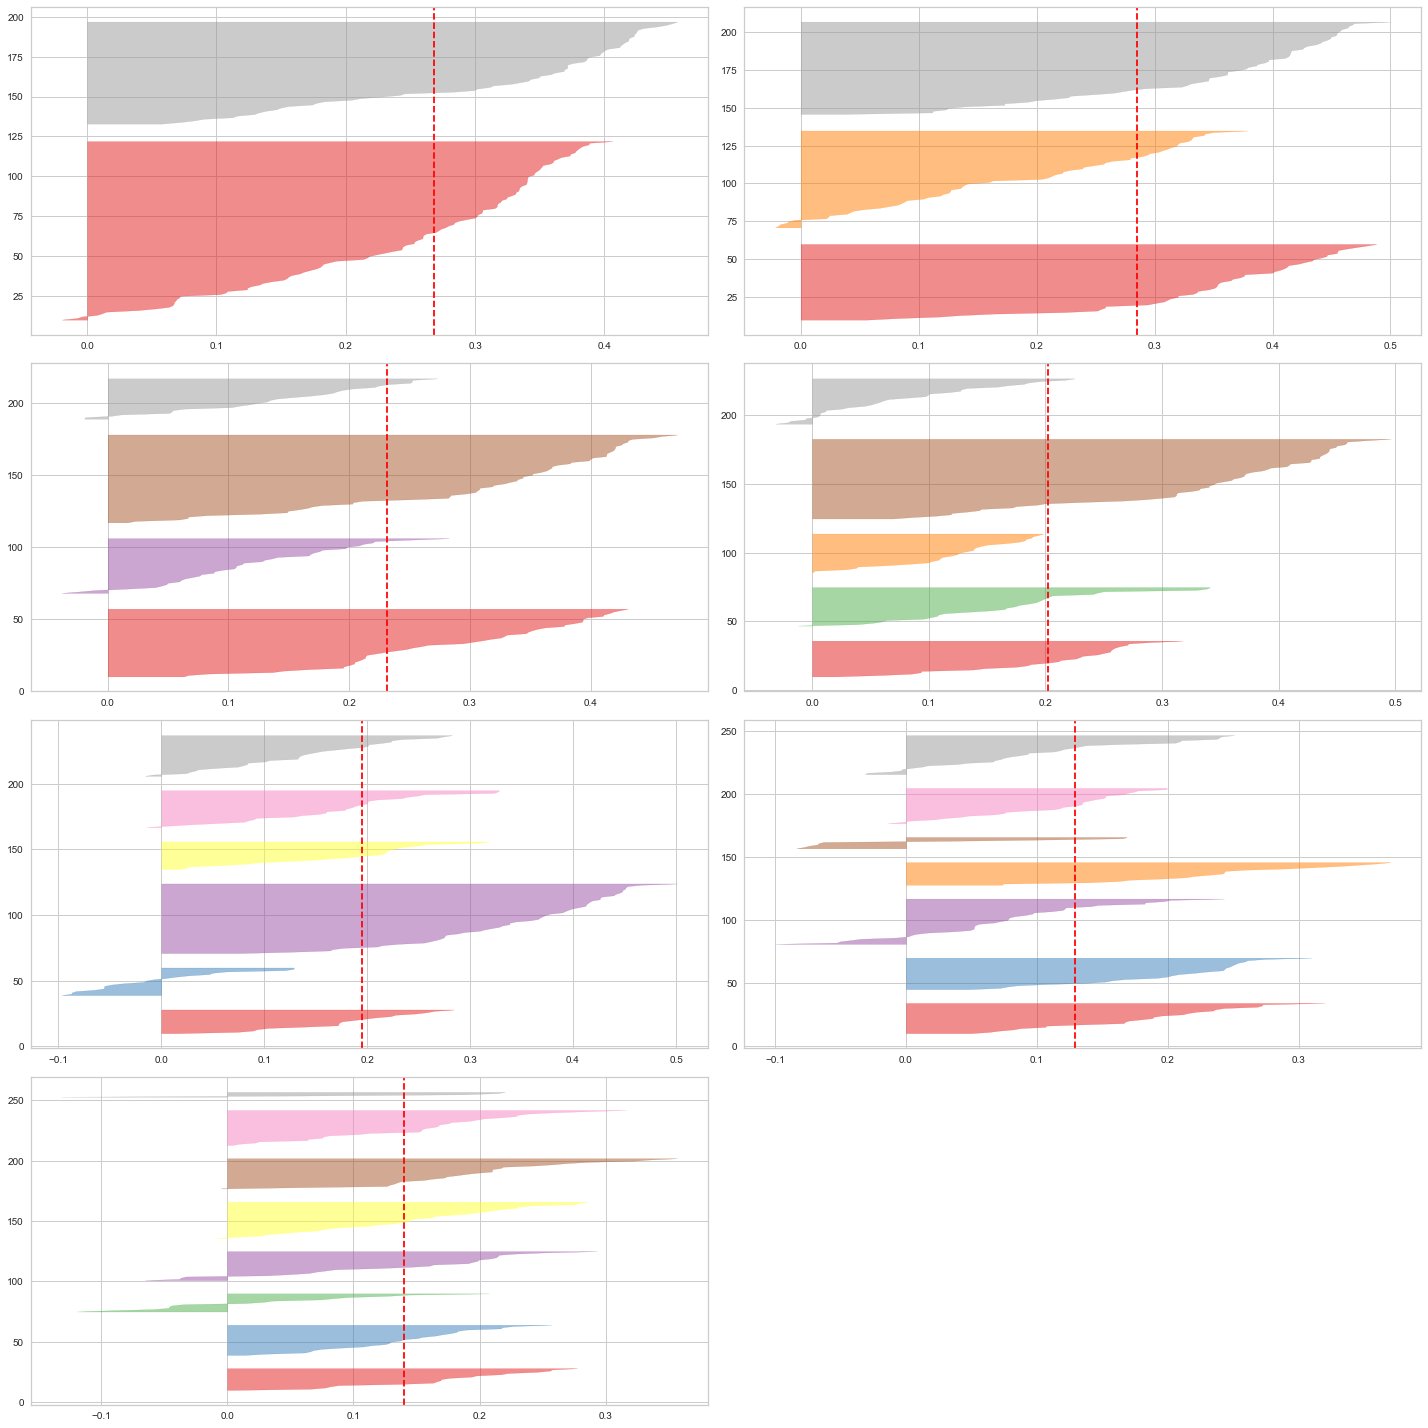

In [27]:
t=1
plt.figure(figsize=(20,20))
for i in n_clus:    
    plt.subplot(4,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(estimator=model)
    sil_viz.fit(data_s)
    t+=1
plt.tight_layout()
plt.show()

In [28]:
model = KMeans(n_clusters=3)

In [29]:
label_km = model.fit_predict(data_s)

In [30]:
label_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [31]:
data_s['label_KM'] = label_km

In [32]:
data_s

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label_KM
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009,2
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242,2
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148,2
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574,2
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952,1
174,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893,1
175,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575,1
176,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498,1


In [33]:
data_s['label_KM'].value_counts()

0    65
2    62
1    51
Name: label_KM, dtype: int64

In [34]:
centroids = model.cluster_centers_

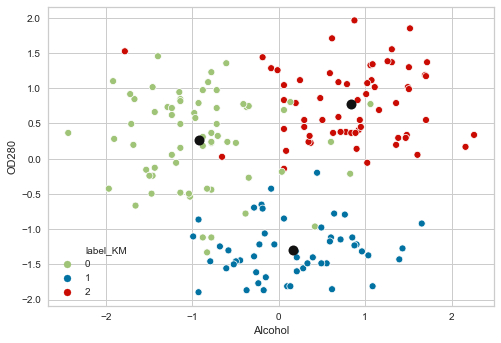

In [35]:
sns.scatterplot(x=data_s['Alcohol'],y=data_s['OD280'],hue=data_s['label_KM'],palette=['g','b','r'])
plt.plot(centroids[0][0],centroids[0][11],marker='o',color='k',ms=10)
plt.plot(centroids[1][0],centroids[1][11],marker='o',color='k',ms=10)
plt.plot(centroids[2][0],centroids[2][11],marker='o',color='k',ms=10)
plt.show()

In [39]:
sill_km = silhouette_score(sc.fit_transform(data),label_km)

In [40]:
centroids[0][0]

-0.926071845174065

In [41]:
centroids[0][11]

0.2707641889998875

In [42]:
data['Label_KM'] = label_km

In [43]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label_KM
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


In [44]:
data.groupby(by=['Label_KM']).mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Label_KM,,,,,,,,,,,,,
0,12.250923,1.889731,2.236288,20.056923,92.492308,2.247692,2.050000,0.357692,1.615231,2.973077,1.061419,2.803385,510.169231
1,13.134118,3.296373,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.165098,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.461573,17.420968,107.483871,2.847581,3.003226,0.292097,1.917581,5.453548,1.065484,3.163387,1100.225806


### Aggloromative Clustering

In [45]:
del data_s['label_KM']

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

In [48]:
from scipy.spatial.distance import pdist

In [49]:
dend_dist = linkage(data_s,method='ward')

In [50]:
eucl_dist = pdist(data_s)

In [51]:
cophenet_coeff = cophenet(dend_dist,eucl_dist)[0]

In [52]:
cophenet_coeff

0.6760767470704768

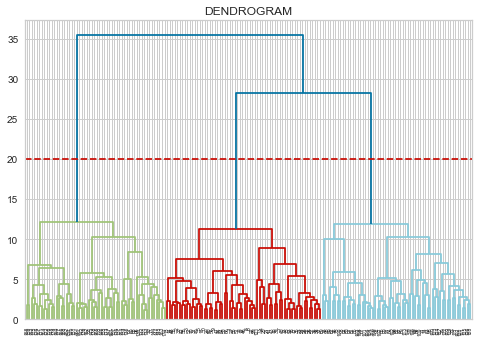

In [53]:
plt.title('DENDROGRAM')
dend = dendrogram(dend_dist)
plt.axhline(y=20,ls='--',color='r')
plt.show()

In [54]:
model_agglo = AgglomerativeClustering(n_clusters=3)

In [55]:
label_agglo = model_agglo.fit_predict(data_s)

In [56]:
data_s['Label'] = label_agglo

<AxesSubplot:xlabel='Alcohol', ylabel='OD280'>

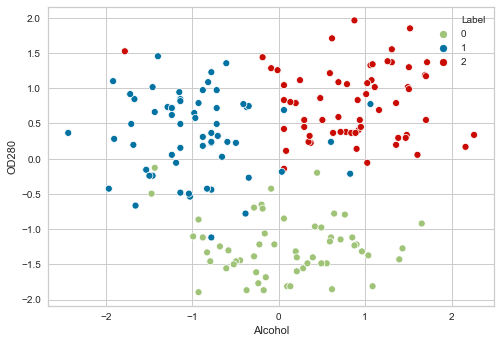

In [57]:
sns.scatterplot(x=data_s['Alcohol'],y=data_s['OD280'],hue=data_s['Label'],palette=['g','b','r'])

In [59]:
sill_agglo = silhouette_score(sc.fit_transform(data),label_agglo)

In [60]:
print('Silhouette Score Kmeans:',sill_km)
print('Silhouette Score Aggloromative:',sill_agglo)

Silhouette Score Kmeans: 0.2854626783251893
Silhouette Score Aggloromative: 0.31940883876329723


### DBSCAN

In [80]:
del data_s['Label']

In [93]:
from sklearn.cluster import DBSCAN

In [82]:
# Decide the value of epsilon and min samples

In [83]:
from sklearn.neighbors import NearestNeighbors

In [84]:
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(data_s)

NearestNeighbors(n_neighbors=2)

In [85]:
distance,index = neigh.kneighbors(data_s)

In [86]:
distance = np.sort(distance,axis=0)

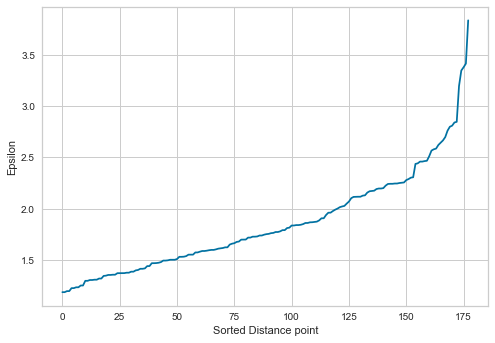

In [87]:
plt.plot(distance[:,1])
plt.ylabel('Epsilon')
plt.xlabel('Sorted Distance point')
plt.show()

In [88]:
# epsilon = 2.7,3
# min_samples = n (no of features) -- (2*n)-2, 13 to 24

In [110]:
sil_score = []
for i in range(10,25):
    model = DBSCAN(eps=3,min_samples=i)
    pred = model.fit_predict(data_s)
    sil_score.append(silhouette_score(data_s,pred))
    
for i in range(len(sil_score)):
    print('Epsilon: ',3,'\tMin Sample: ',i+10,'\tSilhoute score: ',sil_score[i])

Epsilon:  3 	Min Sample:  10 	Silhoute score:  0.16728435165751207
Epsilon:  3 	Min Sample:  11 	Silhoute score:  0.16102737929242394
Epsilon:  3 	Min Sample:  12 	Silhoute score:  0.15341986074154745
Epsilon:  3 	Min Sample:  13 	Silhoute score:  0.15341986074154745
Epsilon:  3 	Min Sample:  14 	Silhoute score:  0.14715309715730232
Epsilon:  3 	Min Sample:  15 	Silhoute score:  0.14715309715730232
Epsilon:  3 	Min Sample:  16 	Silhoute score:  0.14715309715730232
Epsilon:  3 	Min Sample:  17 	Silhoute score:  0.14715309715730232
Epsilon:  3 	Min Sample:  18 	Silhoute score:  0.14286146518670664
Epsilon:  3 	Min Sample:  19 	Silhoute score:  0.14286146518670664
Epsilon:  3 	Min Sample:  20 	Silhoute score:  0.13510428657399207
Epsilon:  3 	Min Sample:  21 	Silhoute score:  0.13322316423587735
Epsilon:  3 	Min Sample:  22 	Silhoute score:  0.2243618534925103
Epsilon:  3 	Min Sample:  23 	Silhoute score:  0.21916855641743152
Epsilon:  3 	Min Sample:  24 	Silhoute score:  0.21417929844484

In [105]:
# eps=3 and min_samples=22

In [111]:
model_dbscan = DBSCAN(eps=3,min_samples=22)

In [113]:
label_db = model_dbscan.fit_predict(data_s)

In [114]:
label_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [115]:
data_s['Label'] = label_db

<AxesSubplot:xlabel='Alcohol', ylabel='OD280'>

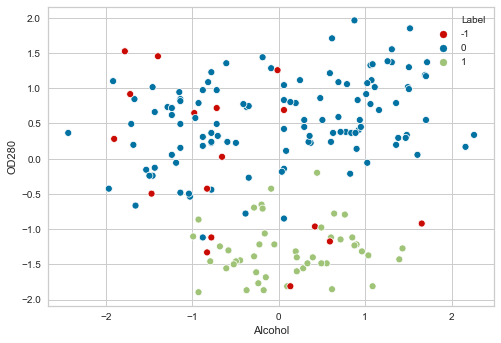

In [116]:
sns.scatterplot(x=data_s['Alcohol'],y=data_s['OD280'],hue=data_s['Label'],palette=['r','b','g'])

In [118]:
sill_db = silhouette_score(sc.fit_transform(data),label_db)

In [119]:
print('Silhouette Score Kmeans:',sill_km)
print('Silhouette Score Aggloromative:',sill_agglo)
print('Silhouette Score DBSCAN:',sill_db)

Silhouette Score Kmeans: 0.2854626783251893
Silhouette Score Aggloromative: 0.31940883876329723
Silhouette Score DBSCAN: 0.2158907305516596


### Dimension Reduction Technique

#### PCA

In [122]:
del data_s['Label']

In [123]:
cov_mat = np.cov(data_s.T)

In [124]:
cov_mat  # 13 X 13

array([[ 1.00564972,  0.09529158,  0.2214182 , -0.31395502,  0.30388006,
         0.29073446,  0.23815287, -0.15681042,  0.15403617,  0.55220976,
        -0.06753548,  0.07275191,  0.64735687],
       [ 0.09529158,  1.00564972,  0.16755524,  0.29755329, -0.03955084,
        -0.34096566, -0.41721865,  0.29586545, -0.2358999 ,  0.26639339,
        -0.56960856, -0.37468661, -0.19225258],
       [ 0.2214182 ,  0.16755524,  1.00564972,  0.43012909,  0.32433258,
         0.12513898,  0.09811293,  0.18470352,  0.00611461,  0.25825004,
        -0.07633311, -0.01127709,  0.23097325],
       [-0.31395502,  0.29755329,  0.43012909,  1.00564972, -0.09858424,
        -0.33492783, -0.36545785,  0.37136184, -0.20997347,  0.00980346,
        -0.28828387, -0.28865319, -0.45123486],
       [ 0.30388006, -0.03955084,  0.32433258, -0.09858424,  1.00564972,
         0.22831719,  0.21061466, -0.25711879,  0.20256604,  0.24186388,
         0.04023258,  0.06438116,  0.41388196],
       [ 0.29073446, -0.340965

In [126]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [129]:
eig_val

array([4.7686445 , 2.56367336, 1.42646751, 0.92329619, 0.82323264,
       0.62949521, 0.52705646, 0.10551416, 0.35880511, 0.17343673,
       0.29186674, 0.22949559, 0.25246214])

In [128]:
eig_vec # 13 X 13 matrix

(13, 13)

In [130]:
# (178 X 13)*(13 X 13) = (178 X 13)

In [134]:
pcs = np.dot(sc.fit_transform(data),eig_vec)

In [135]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.358147,1.520222,-0.126375,0.224356,-0.710891,0.176645,0.701154,-0.108299,0.019187,-0.599343,-0.689257,-0.359055,1.031209
1,2.229215,-0.333261,-2.042838,0.365783,0.107448,0.984902,0.048001,0.003640,0.991649,-0.372289,0.379664,-0.120602,0.208787
2,2.540057,1.036953,1.018845,-0.766907,0.363113,-0.537666,0.412691,0.042033,-0.464401,-0.046713,1.164755,-0.289991,0.136538
3,3.781124,2.782566,-0.149224,-0.593304,0.273054,-0.132210,-0.394978,-0.380455,0.694895,0.318833,-0.001904,0.688896,0.241293
4,1.016872,0.955225,2.113169,0.431732,-0.357108,0.386733,0.487160,-0.050547,0.377559,0.165368,-0.283486,-0.577236,-0.036566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,-0.925038,0.633273,1.060998,0.685717,-0.135217,-0.130305,-0.102554,0.027147,0.111934,-0.235376
174,-2.612425,1.797712,0.210332,-0.398412,-0.192034,-0.011534,0.136131,-0.181156,-0.565178,0.309409,0.063488,0.236649,-0.222939
175,-2.671169,2.865301,-0.975126,-0.360633,-1.185098,-0.354148,0.853504,-0.025525,0.013484,-0.646957,-0.020689,0.595734,-0.267263
176,-2.371603,2.393808,-0.561485,0.643948,-0.658651,-1.252325,0.813131,-0.083471,0.351025,-0.346681,-0.086492,0.353956,0.495366


In [136]:
### sklearn

In [137]:
from sklearn.decomposition import PCA

In [138]:
pca = PCA(n_components=13)

In [139]:
data_pca = pca.fit_transform(data_s)

In [155]:
data_pca

array([[ 3.35814747, -1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481,  0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743, -1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907, -2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346, -2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394, -2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

In [146]:
var = pca.explained_variance_ratio_

In [145]:
pca.explained_variance_  # eigen values

array([4.7686445 , 2.56367336, 1.42646751, 0.92329619, 0.82323264,
       0.62949521, 0.52705646, 0.35880511, 0.29186674, 0.25246214,
       0.22949559, 0.17343673, 0.10551416])

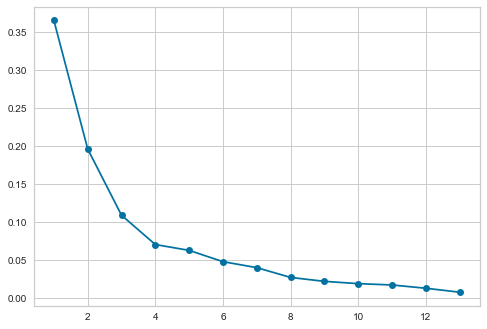

In [147]:
# scree plot
plt.plot(np.arange(1,14),var,marker='o')

In [150]:
cum_var=[]
add = 0
for i in var:
    add=add+i
    cum_var.append(add)

In [151]:
cum_var

[0.36475802794799045,
 0.5608557742813384,
 0.6699675930589241,
 0.7405913724380714,
 0.8035611982340874,
 0.8517118690088402,
 0.8920269050684425,
 0.9194722395122921,
 0.9417973962872351,
 0.9611084588283136,
 0.9786627885466598,
 0.9919291241842695,
 1.0]

In [160]:
pca_2 = PCA(n_components=2)

In [161]:
data_pca = pca_2.fit_transform(data_s)

In [162]:
pca_2.explained_variance_ratio_

array([0.36475803, 0.19609775])

In [163]:
data_red = pd.DataFrame({'PC1':data_pca[:,0],'PC2':data_pca[:,1]})

In [165]:
data_red['Label'] = label_agglo

In [166]:
data_red

,PC1,PC2,Label
0,3.358147,-1.520222,2
1,2.229215,0.333261,2
2,2.540057,-1.036953,2
3,3.781124,-2.782566,2
4,1.016872,-0.955225,2
...,...,...,...
173,-3.311751,-2.173369,0
174,-2.612425,-1.797712,0
175,-2.671169,-2.865301,0
176,-2.371603,-2.393808,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

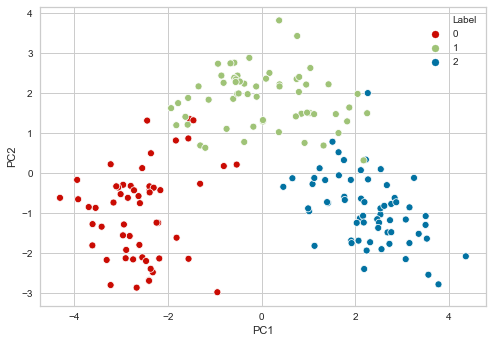

In [168]:
sns.scatterplot(data_red['PC1'],data_red['PC2'],hue=data_red['Label'],palette=['r','g','b'])

### LDA

In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [170]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [172]:
data_s['label'] = label_agglo

In [174]:
x = data_s.drop(columns=['label'])
y = data_s['label']

In [179]:
lda_data = lda.fit_transform(x,y)

In [180]:
lda_data = pd.DataFrame(lda_data,columns={'LD1','LD2'})

In [181]:
lda_data

,LD1,LD2
0,4.951629,1.815748
1,3.799786,1.069531
2,3.874983,0.598513
3,4.801268,3.398528
4,1.526292,0.722442
...,...,...
173,-4.182016,2.798888
174,-4.352283,1.758683
175,-4.700932,3.203480
176,-4.371002,2.753146


In [182]:
lda.explained_variance_ratio_

array([0.75861031, 0.24138969])

In [183]:
lda_data['label'] = label_agglo

In [184]:
lda_data

,LD1,LD2,label
0,4.951629,1.815748,2
1,3.799786,1.069531,2
2,3.874983,0.598513,2
3,4.801268,3.398528,2
4,1.526292,0.722442,2
...,...,...,...
173,-4.182016,2.798888,0
174,-4.352283,1.758683,0
175,-4.700932,3.203480,0
176,-4.371002,2.753146,0


<AxesSubplot:xlabel='LD1', ylabel='LD2'>

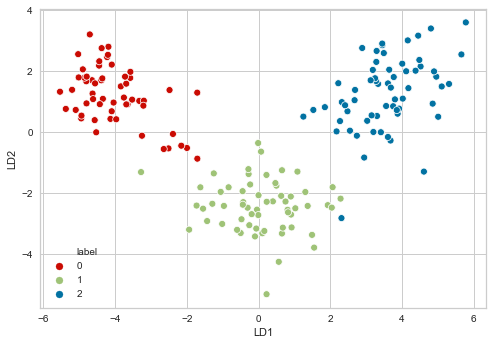

In [185]:
sns.scatterplot(lda_data['LD1'],lda_data['LD2'],hue=lda_data['label'],palette=['r','g','b'])

In [186]:
### Projection vector

In [188]:
projection_vector = lda.scalings_

In [189]:
projection_vector.shape

(13, 2)

In [190]:
# (178 X 13)*(13 X 2) = 178 X 2

In [193]:
np.dot(sc.fit_transform(data),projection_vector)

array([[ 4.95162904e+00,  1.81574771e+00],
       [ 3.79978596e+00,  1.06953060e+00],
       [ 3.87498283e+00,  5.98512797e-01],
       [ 4.80126843e+00,  3.39852777e+00],
       [ 1.52629235e+00,  7.22442339e-01],
       [ 4.44744085e+00,  3.16341165e+00],
       [ 4.51382893e+00,  2.15101562e+00],
       [ 4.15656525e+00,  3.00737782e+00],
       [ 3.60563695e+00,  1.59417287e+00],
       [ 4.01738147e+00,  1.09462770e+00],
       [ 5.30612438e+00,  1.57673798e+00],
       [ 3.33024221e+00,  1.57891710e+00],
       [ 3.68524583e+00,  1.45587817e+00],
       [ 5.10269734e+00,  1.49342485e+00],
       [ 5.65107492e+00,  2.54583680e+00],
       [ 3.48907946e+00,  2.59092391e+00],
       [ 3.44988608e+00,  2.85022559e+00],
       [ 3.18281665e+00,  2.03709728e+00],
       [ 5.77377493e+00,  3.59816630e+00],
       [ 3.27251010e+00,  1.67286010e+00],
       [ 3.91573960e+00,  7.66452185e-01],
       [ 2.17319451e+00,  1.67468842e-02],
       [ 5.00428041e+00,  4.98607605e-01],
       [ 3.